In [1]:
PATH = "/home/mdobrzanski/playground/IET/NLP/ustawy/"
%config Completer.use_jedi = False

In [2]:
import regex as re
import os
from morfeusz2 import Morfeusz 
import matplotlib.pyplot as plt
import elasticsearch
import elasticsearch_dsl
import os
import re
import spacy

In [3]:
morf = Morfeusz()

In [4]:
es = elasticsearch.Elasticsearch()
elasticsearch_dsl.connections.add_connection('python_client', es)
es.info()

{'name': 'mdobrzanski-ASUS-TUF-Gaming-A15-FA506QM-FA506QM',
 'cluster_name': 'elasticsearch',
 'cluster_uuid': 'qmsaKyaSTGuNyBjvpOr_1A',
 'version': {'number': '7.10.1',
  'build_flavor': 'default',
  'build_type': 'tar',
  'build_hash': '1c34507e66d7db1211f66f3513706fdf548736aa',
  'build_date': '2020-12-05T01:00:33.671820Z',
  'build_snapshot': False,
  'lucene_version': '8.7.0',
  'minimum_wire_compatibility_version': '6.8.0',
  'minimum_index_compatibility_version': '6.0.0-beta1'},
 'tagline': 'You Know, for Search'}

In [5]:
laws = {}

for filename in os.listdir(PATH):
    with open(PATH+filename, 'r') as file:
        tmp = file.read()
    laws[filename] = tmp

# 1

In [6]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [7]:
laws = {k: remove_html_tags(v) for k, v in laws.items()}

# 2

In [8]:
# !python -m spacy download pl_core_news_sm

In [9]:
nlp = spacy.load('pl_core_news_sm')
tokenizer = nlp.tokenizer

In [10]:
law_tokens = {}

for k, v in laws.items():
    law_tokens[k] = [token.text.lower() for token in tokenizer(v)]

# 3

In [11]:
law_tokens_count = {}

for k, v in law_tokens.items():
    law_tokens_count[k] = dict()
    for i in v:
        law_tokens_count[k][i] = law_tokens_count[k].get(i, 0) + 1

In [12]:
sorted(law_tokens_count['1996_146.txt'].items(), key=lambda x: x[1], reverse=True)

[('.', 166),
 (',', 97),
 (')', 40),
 ('w', 38),
 ('z', 35),
 ('"', 32),
 ('i', 32),
 ('art', 30),
 ('\n                ', 29),
 ('nr', 27),
 ('poz', 27),
 ('agencji', 26),
 ('\n', 21),
 ('1', 20),
 (':', 20),
 ('r', 18),
 ('\n                 ', 18),
 ('3', 17),
 ('rynku', 16),
 ('oraz', 15),
 ('\n                   ', 15),
 ('na', 15),
 ('2', 14),
 ('4', 14),
 ('\n   ', 14),
 ('się', 13),
 ('ust', 13),
 ('produktów', 12),
 ('o', 11),
 ('ministrów', 11),
 ('rolnego', 9),
 ('agencja', 9),
 (';', 9),
 ('rolnych', 9),
 ('\n             ', 9),
 ('\n              ', 8),
 ('dnia', 7),
 ('otrzymuje', 7),
 ('brzmienie', 7),
 ('żywnościowych', 7),
 ('rolnictwa', 7),
 ('przez', 7),
 ('prezes', 7),
 ('gospodarki', 7),
 ('6', 7),
 ('rady', 7),
 ('dz', 6),
 ('u', 6),
 ('ustawy', 6),
 ('7', 6),
 ('dodaje', 6),
 ('\n                     ', 6),
 ('żywnościowej', 6),
 ('finansów', 6),
 ('ministra', 6),
 ('zasady', 6),
 ('9', 6),
 ('(', 5),
 ('brzmieniu', 5),
 ('działalności', 5),
 ('5', 5),
 ('utworze

In [13]:
law_tokens_count['1996_146.txt']

{'\n\n\n\n': 1,
 'dz': 6,
 '.': 166,
 'u': 6,
 'z': 35,
 '1996': 3,
 'r': 18,
 'nr': 27,
 '34': 1,
 ',': 97,
 'poz': 27,
 '146': 1,
 '\n                                    \n                                    \n                                    \n                                    \n                                 ': 1,
 'ustawa': 2,
 '\n                        ': 1,
 'dnia': 7,
 '2': 14,
 'lutego': 2,
 '\n                                    \n          ': 1,
 'o': 11,
 'zmianie': 1,
 'ustawy': 6,
 'utworzeniu': 4,
 'agencji': 26,
 'rynku': 16,
 'rolnego': 9,
 '\n                      ': 1,
 'oraz': 15,
 'niektórych': 1,
 'innych': 2,
 'ustaw': 1,
 '\n                                    \n                                    \n                                ': 1,
 'art': 30,
 '1': 20,
 '\n': 21,
 'w': 38,
 'ustawie': 4,
 '7': 6,
 'czerwca': 3,
 '1990': 2,
 '(': 5,
 '39': 2,
 '223': 2,
 ')': 40,
 'wprowadza': 1,
 'się': 13,
 'następujące': 1,
 'zmiany': 1,
 ':': 20,
 '\n \n ': 3,
 

# 4

In [14]:
global_tokens = [(k, v) for values in law_tokens_count.values() for k, v in values.items()]

In [15]:
# global_tokens

In [16]:
global_tokens_count = {}

for v in global_tokens:
    global_tokens_count[v[0]] = global_tokens_count.get(v[0], 0) + v[1]

In [17]:
sorted(global_tokens_count.items(), key=lambda x: x[1], reverse=True)

[('.', 437694),
 (',', 341126),
 ('w', 201224),
 ('\n', 181703),
 (')', 100194),
 ('i', 90009),
 ('art', 83804),
 ('z', 82443),
 ('1', 73108),
 ('o', 64776),
 ('-', 61714),
 ('do', 60735),
 ('2', 57027),
 ('"', 54913),
 ('\n  ', 54885),
 ('\n     ', 54047),
 ('ust', 53636),
 ('na', 50647),
 ('\n   ', 46777),
 ('się', 45886),
 ('lub', 45800),
 ('poz', 45224),
 ('nr', 44950),
 (':', 39203),
 ('3', 39084),
 ('oraz', 33558),
 ('r', 33177),
 ('\n           ', 32942),
 ('mowa', 28783),
 (';', 25266),
 ('4', 24271),
 ('nie', 22990),
 ('przez', 20953),
 ('\n       ', 20937),
 ('\n             ', 20532),
 ('§', 20474),
 ('pkt', 19124),
 ('dnia', 17954),
 ('których', 17932),
 ('5', 17435),
 ('\n ', 17290),
 ('a', 17133),
 ('_', 16809),
 ('od', 16687),
 ('\n         ', 16498),
 ('po', 13547),
 (' ', 13542),
 ('jest', 13197),
 ('ustawy', 13099),
 ('(', 13031),
 ('6', 12738),
 ('może', 12096),
 ('jeżeli', 12044),
 ('którym', 11789),
 ('za', 11146),
 ('\n                ', 10648),
 ('\xa0', 10604),


# 5

In [18]:
def check(k):
    if len(k)<2:
        return False
    if not k.isalpha():
        return False
    return True

In [19]:
global_tokens_count = {k: v for k, v in global_tokens_count.items() if check(k)}

In [20]:
sorted(global_tokens_count.items(), key=lambda x: x[1], reverse=True)

[('art', 83804),
 ('do', 60735),
 ('ust', 53636),
 ('na', 50647),
 ('się', 45886),
 ('lub', 45800),
 ('poz', 45224),
 ('nr', 44950),
 ('oraz', 33558),
 ('mowa', 28783),
 ('nie', 22990),
 ('przez', 20953),
 ('pkt', 19124),
 ('dnia', 17954),
 ('których', 17932),
 ('od', 16687),
 ('po', 13547),
 ('jest', 13197),
 ('ustawy', 13099),
 ('może', 12096),
 ('jeżeli', 12044),
 ('którym', 11789),
 ('za', 11146),
 ('brzmienie', 10576),
 ('spraw', 10021),
 ('otrzymuje', 9835),
 ('dz', 8885),
 ('albo', 8708),
 ('dodaje', 8423),
 ('ich', 8199),
 ('dla', 7934),
 ('pracy', 7631),
 ('minister', 7580),
 ('której', 7476),
 ('brzmieniu', 7295),
 ('drodze', 7179),
 ('podstawie', 6849),
 ('stosuje', 6680),
 ('przypadku', 6494),
 ('niż', 6452),
 ('tym', 6366),
 ('jego', 6320),
 ('są', 6156),
 ('być', 6120),
 ('zakresie', 6098),
 ('właściwy', 6094),
 ('państwa', 5839),
 ('przepisy', 5839),
 ('wyrazy', 5817),
 ('ze', 5509),
 ('ustawie', 5478),
 ('także', 5445),
 ('przepisów', 5343),
 ('rozporządzenia', 5338),
 

# 6

In [21]:
global_tokens_count_values = sorted(global_tokens_count.values(), reverse=True)

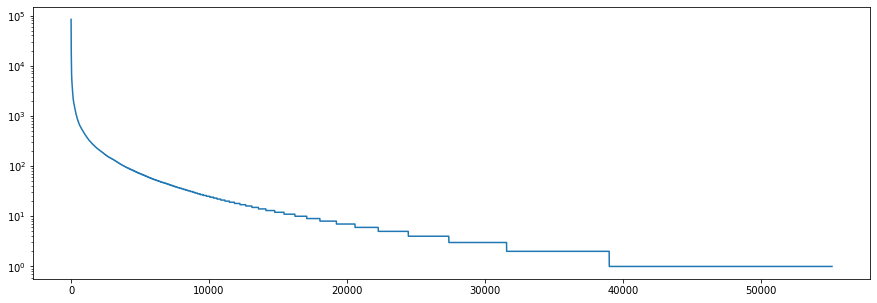

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(global_tokens_count_values)
plt.yscale('log')
plt.show()

# 7

In [23]:
def dummy_checker(k):
    a = morf.analyse(k)
    if len(a)==1:
        if a[0] == (0, 1, (k, k, 'ign', [], [])):
            return False
    return True

In [24]:
wrong_words = []

for word in global_tokens_count.keys():
    if not dummy_checker(word):
        wrong_words.append(word)

In [25]:
wrong_words

['poz',
 'organizacyjno',
 'techniczno',
 'zbożowo',
 'pzz',
 'wco',
 'późn',
 'zm',
 'vitro',
 'biobójczych',
 'utk',
 'str',
 'cytopatologii',
 'mującą',
 'podarującymi',
 'nosprawności',
 'dzialności',
 'sżory',
 'swprowadzanych',
 'uzbro',
 'jonych',
 'turystyczno',
 'ekonomiczno',
 'odtworzeniowejlokalu',
 'rolno',
 'perry',
 'cn',
 'ex',
 'publiczno',
 'isaf',
 'społeczno',
 'zdawczo',
 'zerokuponowych',
 'future',
 'zanonimizowanej',
 'charytatywno',
 'ministrer',
 'religijno',
 'maranatha',
 'elim',
 'syloe',
 'betania',
 'betezda',
 'głębce',
 'anastasis',
 'kanaan',
 'kostrzyń',
 'vision',
 'ici',
 'teen',
 'barratta',
 'gedi',
 'patmos',
 'rekolekcjny',
 'internatowo',
 'jeżli',
 'wydat',
 'ków',
 'członowskich',
 'ubezpie',
 'czeniowych',
 'formalno',
 'paliwowo',
 'ure',
 'mj',
 'kv',
 'przeciwporażeniowej',
 'iva',
 'pkwiu',
 'rehabilitacyjno',
 'przeprowa',
 'dzonej',
 'sww',
 'know',
 'how',
 'pra',
 'wnych',
 'kśt',
 'sodpłatnego',
 'inwestycy',
 'jnych',
 'biorstwach'

# 8

In [26]:
wrong_words = [(w, global_tokens_count[w]) for w in wrong_words]

In [27]:
wrong_words = sorted(wrong_words, key=lambda w: w[1], reverse=True)

In [28]:
wrong_words[:30]

[('poz', 45224),
 ('późn', 1065),
 ('str', 516),
 ('gmo', 298),
 ('sww', 216),
 ('operacyjno', 209),
 ('skw', 196),
 ('rolno', 194),
 ('zm', 192),
 ('ex', 167),
 ('ike', 162),
 ('społeczno', 137),
 ('techniczno', 125),
 ('remediacji', 120),
 ('ure', 103),
 ('rozdz', 102),
 ('uke', 97),
 ('itp', 96),
 ('kn', 95),
 ('sanitarno', 88),
 ('charytatywno', 87),
 ('np', 85),
 ('cn', 83),
 ('pkwiu', 81),
 ('udt', 77),
 ('bswsg', 70),
 ('bswp', 66),
 ('biobójczych', 63),
 ('organizacyjno', 58),
 ('phs', 53)]

# 9

In [29]:
wrong_words_3_to_7 = [w for w in wrong_words if 3<=w[1]<=7]

In [30]:
import random

In [31]:
random.sample(wrong_words_3_to_7, 30)

[('harmoniowych', 4),
 ('schetyna', 5),
 ('moczowo', 3),
 ('zalądowionych', 4),
 ('zawar', 4),
 ('trzeżeniem', 3),
 ('metylobutylo', 3),
 ('składnikw', 3),
 ('mieszkalno', 5),
 ('haematopoietic', 3),
 ('obserwacyjno', 6),
 ('wawczej', 3),
 ('agave', 5),
 ('zwierzęc', 4),
 ('wych', 4),
 ('ktry', 3),
 ('tele', 3),
 ('hagera', 3),
 ('turystyczno', 3),
 ('posodowe', 3),
 ('stcw', 7),
 ('medical', 3),
 ('morfolina', 3),
 ('aw', 3),
 ('rozpuszczalnoś', 4),
 ('tio', 3),
 ('betaagonistycznym', 3),
 ('publiczno', 7),
 ('organicz', 5),
 ('rozpu', 3)]

# 10

In [78]:
alpha = 'aąbcćdeęfghijklłmnńoópqrsśtuvwxyzźż'

def generate_neighbours(word):
    result = []
    for i, c in enumerate(word):
        result.append(word[:i]+word[i+1:])
        
        for l in alpha:
            result.append(word[:i]+l+word[i:])
            
            result.append(word[:i]+l+word[i+1:])
    return result


def generate_up_to_dist(word, n):
    result = [word]
    for i in range(n):
        result_tmp = []
        for w in result:
            result_tmp += generate_neighbours(w)
        result += result_tmp
    return list(set(result))
    

def filter_list(l):   
    return list(filter(dummy_checker,l))


def generate_from_dict(word, n):
    l = generate_up_to_dist(word, n)
    return filter_list(l)


def generate_till_anythink(word, limit=3):
    l=[]
    n = 1
    while len(l)==0 and n<=limit:
        l = generate_up_to_dist(word, n)
        l = filter_list(l)
        n += 1
    return l

In [79]:
generate_till_anythink('asddas')

['addaks', 'addar', 'addis', 'adidas']

In [81]:
for word in random.sample(wrong_words_3_to_7, 30):
    print(word, '\n')
    print(generate_till_anythink(word[0], 2), '\n\n\n')

('cza', 3) 

['sza', 'łza', 'lza', 'cyza', 'aza', 'czd', 'czka', 'cba', 'zza', 'gza', 'ceza', 'wza', 'ciza', 'ca', 'cła', 'za', 'iza', 'cha', 'czy', 'cia', 'cna'] 



('septicaemia', 3) 

[] 



('vesicular', 4) 

[] 



('ktu', 3) 

['aktu', 'kto', 'ku', 'kątu', 'atu', 'kotu', 'ktg', 'pktu', 'stu', 'tu', 'ketu', 'kitu', 'katu'] 



('protokoł', 4) 

['protopoł', 'protoboł', 'protokom', 'prosokoł', 'prookoł', 'protokół'] 



('molibdenia', 4) 

['molibdenie', 'molibdenit'] 



('obj', 7) 

['oby', 'obuj', 'oj', 'obu', 'obi', 'obr', 'obł', 'obij', 'obój', 'bj', 'obaj', 'ob', 'oboj', 'oba'] 



('msv', 4) 

['mdv', 'msw', 'miv', 'mmv', 'mcv', 'msz', 'mv', 'mlv', 'msp', 'mxv', 'mtv', 'ms'] 



('urt', 5) 

['uro', 'urb', 'ort', 'burt', 'uri', 'purt', 'url', 'urm', 'hurt', 'upt', 'kurt', 'ut', 'art', 'urz', 'uht', 'urd', 'ura', 'urn', 'nurt', 'urę', 'ur', 'ust', 'ukt', 'furt', 'ury', 'urw', 'jurt', 'gurt', 'urą'] 



('mikroeleme', 3) 

['mikroelem'] 



('moe', 7) 

['moś', 'moi', 'mos', 

# 11

In [82]:
es = elasticsearch.Elasticsearch()
elasticsearch_dsl.connections.add_connection('python_client', es)
es.info()

def insert_sgjp_to_es(filename: str):
    with open(filename, encoding="UTF-8") as file:
        # skip header and license, later proper rows have 4 elements divided with tabs, where 1st is the word
        for line in file:
            if len(line.split()) != 4:
                continue
            else:
                yield {
                    "_index": "sgjp",
                    "word": line.split()[0],
                }
                break
        
        i = 0
        for line in file:
            yield {
                "_index": "sgjp",
                "word": line.split()[0],
            }
            
            i += 1
            if i % 100000 == 0:
                print(i)

filename = "sgjp-s.tab"
es = elasticsearch.Elasticsearch()

elasticsearch.helpers.bulk(es, insert_sgjp_to_es(filename), chunk_size=100000, request_timeout=6000)

FileNotFoundError: [Errno 2] No such file or directory: 'sgjp-s.tab'

# 12, 13